<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling and Inferential Statistic
The following topics will be covered here:


1.   Understanding fundamental concepts in sampling techniques
2.   Performing proper sampling under different scenarios
1.   Understanding statistic associated with sampling

## Resource checking & data preparation
*   Check if GPU or TPU is present and enabled
*   Mount Google drive and read excel file
* Use Texas demographic data as the base data

In [2]:
# Test if the gpu / tpu is present and enabled
import tensorflow as tf
if(tf.test.is_gpu_available()):
  print('GPU / TPU is present and enabled')
else:
  print('Neither GPU or TPU is present or enabled')

# Mount google drive
import os
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

# Read Excel file as Data Frame
import pandas as pd
print("pandas version:", pd.__version__)
df = pd.read_excel("drive/MyDrive/Colab Notebooks/PopulationEstimates2013.xlsx",skiprows=2)

# use Texas demographic data as the base data
dfTX = df[df['State']== 'TX'].tail(-1)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Neither GPU or TPU is present or enabled
Mounted at /content/drive/
pandas version: 1.3.5


## Understanding fundamental concepts in sampling techniques
There are 2 major ways of sampling: 
*   **Probability sampling**: involves random selection, every member has equal and known chance. This is the safer approach
*   **Non-probalility sampling**: subjective sampling decision made by the researchers. But this might be prone to bias (convenience, voluntary and purposive)

For probability sampling we can do it using one of the following methods:
1.   Simple random sampling
2.   Stratified random sampling
2.   Systematic random sampling



### Simple Random Sampling (**SRS**)
Let's say that we want to find the mean and standard deviation of counties\' in Texas but it is not possible to perform this in all counties in Texas. Simple random sampling can be done to select a certain percentage of counties in Texas

Below we show the population distribution of counties in Texas

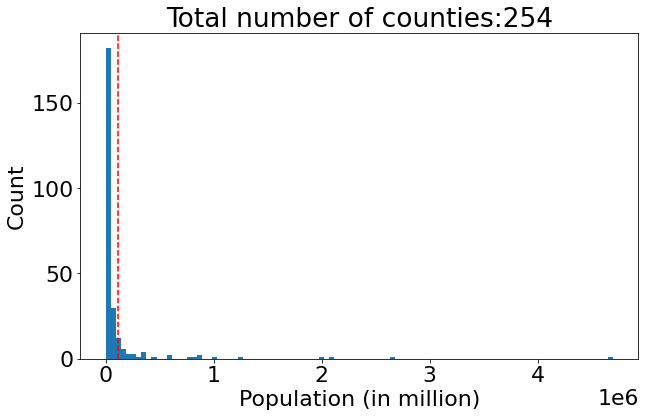

In [3]:
# Declare import
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size':22})
plt.hist(dfTX['POP_ESTIMATE_2018'],bins=100)
plt.title('Total number of counties:{}'.format(len(dfTX['POP_ESTIMATE_2018'])))
plt.axvline(np.mean(dfTX['POP_ESTIMATE_2018']),c='r',linestyle='--')
plt.xlabel('Population (in million)')
plt.ylabel('Count');

From the graph above, there are few counties with populations above 1 million. The majority of these counties have population below the mean (red vertical line) which equal to 112,999. 

The code below select 25 counties in Texas which is 10% of the counties using *random.sample()* and calculates their means.
Notice that the mean 88,842.72 **is less than** the population mean 112,999

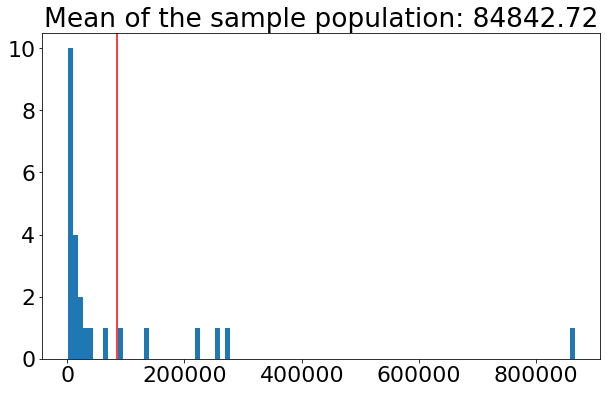

In [4]:
# declare import
import random

random.seed(2020)
plt.figure(figsize=(10,6))
sample = random.sample(dfTX['POP_ESTIMATE_2018'].to_list(),25)
plt.hist(sample, bins=100)
plt.axvline(np.mean(sample),c='r')
plt.title('Mean of the sample population: {}'.format(np.mean(sample)));

The sampling above can be done several more times to get different sampling. The code below repeats the SRS 100 times for 25 random counties, calculates the mean for each repetition and show the means on histogram.
It looks like the original distribution of population

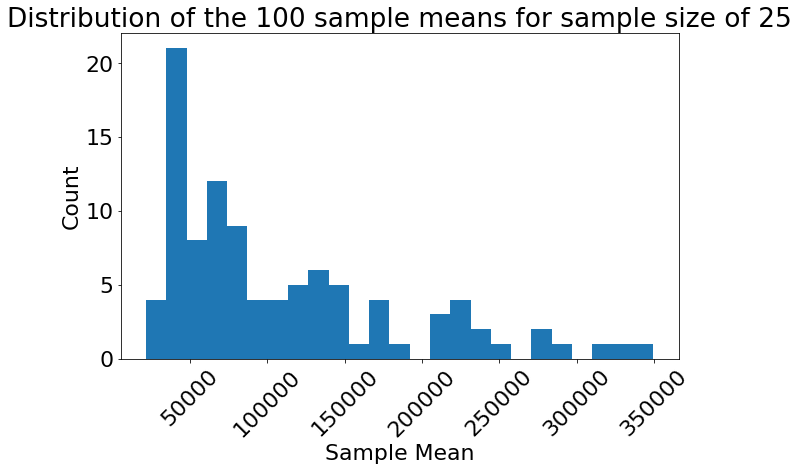

In [5]:
numSample = 25
trials =100
random.seed(2020)
sampleMeans = []
for i in range(trials):
  sample=random.sample(dfTX['POP_ESTIMATE_2018'].to_list(),numSample)
  sampleMeans.append(np.mean(sample))

plt.figure(figsize=(10,6))
plt.hist(sampleMeans,bins=25)
plt.title('Distribution of the {} sample means for sample size of {}'.format(trials,numSample))
plt.gca().xaxis.set_tick_params(rotation=45)
plt.xlabel('Sample Mean')
plt.ylabel('Count');



Distribution shape will change drastically if you **modify the sample size** or **number of trials**. First, let's try to change the sample size to 25 and 100 and set the trials to 1000

**Change of sample size**

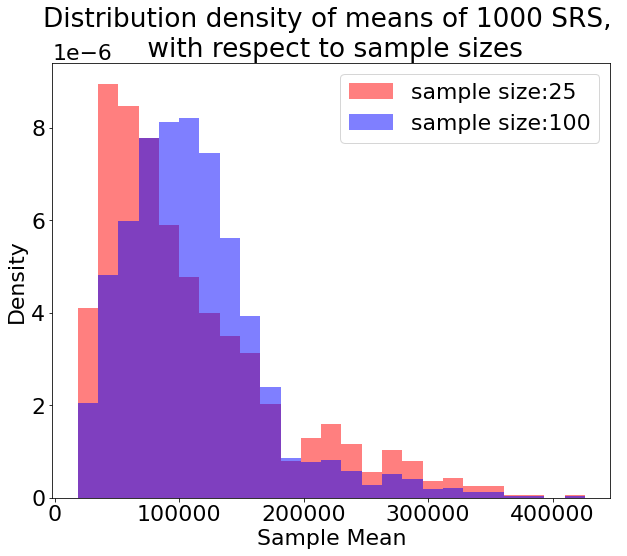

In [6]:
numSamples = [25,100]
colors = ['r','b']
trials = 1000 
random.seed(2020)
plt.figure(figsize=(10,8))
sampleMeans = []
for j in range(len(numSamples)):
  for i in range(trials):
    sample = random.sample(dfTX['POP_ESTIMATE_2018'].to_list(),numSamples[j])
    sampleMeans.append(np.mean(sample))
  plt.hist(sampleMeans,color=colors[j], alpha=0.5,bins=25, label='sample size:{}'.format(numSamples[j]),density=True)
plt.legend()
plt.title('Distribution density of means of 1000 SRS, \n with respect to sample sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Density');


Since we choose a bigger sample size, it is more likely that we will obtain a larger
estimation of the mean of the population data. It is not counter-intuitive because the
mean is very susceptible to extreme values. With a larger sample size, the extreme values,
those > 1 million, are more likely to be selected and therefore increase the chance that the
sample mean is large

**Change of number of trials**

Now let's try to change the number of trials to 1000 and 5000 and see the influences

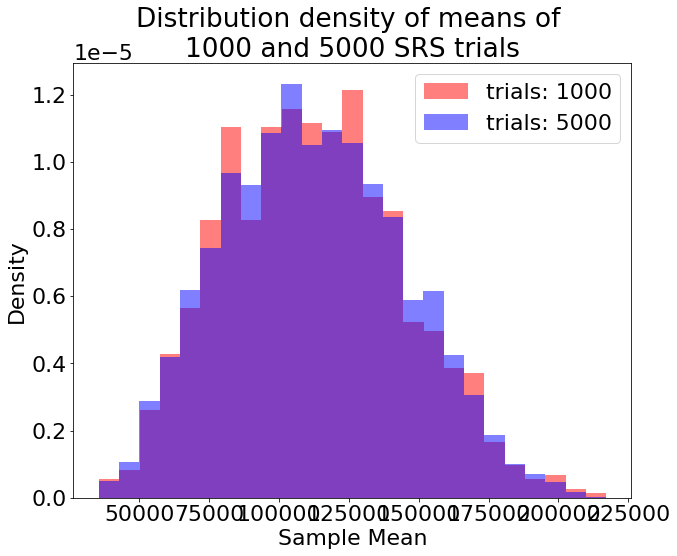

In [7]:
numSample = 100
colors = ['r', 'b']
trials = [1000, 5000]
random.seed(2020)
plt.figure(figsize=(10,8))
sampleMeans=[]
for j in range(len(trials)):
  for i in range(trials[j]):
    sample = random.sample(dfTX['POP_ESTIMATE_2018'].to_list(),numSample)
    sampleMeans.append(np.mean(sample))
  plt.hist(sampleMeans,color=colors[j], alpha=0.5,bins=25,label='trials: {}'.format(trials[j]),density=True)
plt.legend()
plt.title("Distribution density of means of \n1000 and 5000 SRS trials")
plt.xlabel("Sample Mean")
plt.ylabel("Density");

### Stratified Random Sampling
Is the process of grouping population into categories or group and select elements from each group randomly. We will group Texas' counties population into different categories based on their urbanization code 

The code snippet below show some imbalance. If we use SRS, the **level 5** data will have a very low chance of being sampled

In [8]:
from collections import Counter
Counter(dfTX['Rural-urban_Continuum Code_2013'])

Counter({7.0: 39,
         6.0: 65,
         5.0: 6,
         2.0: 25,
         3.0: 22,
         1.0: 35,
         8.0: 20,
         9.0: 29,
         4.0: 13})

Therefore we want to sample equal number entries in each level/strata by taking 4 representative from each urbanization level

In [9]:
random.seed(2020)
samples=[]
for level in sorted(np.unique(dfTX['Rural-urban_Continuum Code_2013'])):
  samples += random.sample(dfTX[dfTX['Rural-urban_Continuum Code_2013']==level]['POP_ESTIMATE_2018'].to_list(),4)

print(np.mean(samples))


144010.47222222222


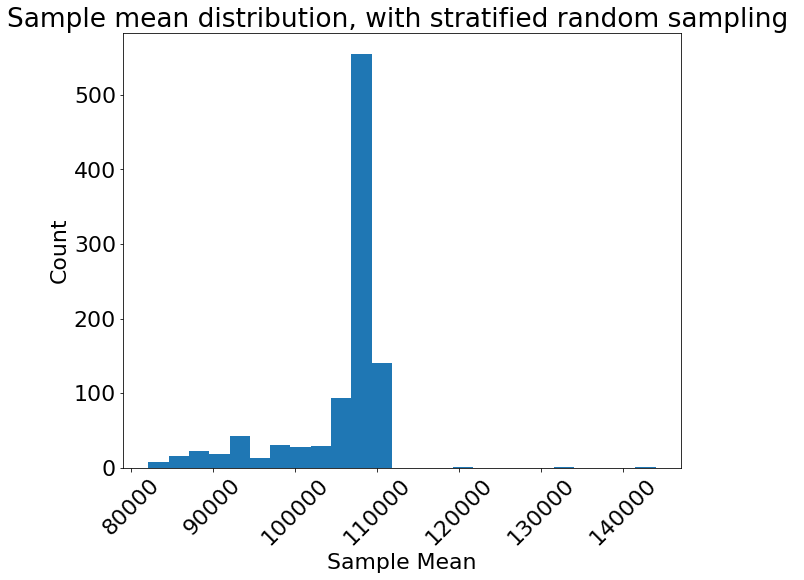

In [10]:
# with 1000 trials
random.seed(2020)
sampleMeans = []
trials=1000
samples=[]
for i in range(trials):
  for level in sorted(np.unique(dfTX['Rural-urban_Continuum Code_2013'])):
    samples += random.sample(dfTX[dfTX['Rural-urban_Continuum Code_2013']==level]['POP_ESTIMATE_2018'].to_list(),4)
  sampleMeans.append(np.mean(samples))

plt.figure(figsize=(10,8))
plt.hist(sampleMeans,bins=25);
plt.title("Sample mean distribution, with stratified random sampling ")
plt.gca().xaxis.set_tick_params(rotation=45)
plt.xlabel("Sample Mean")
plt.ylabel("Count");

Text(0, 0.5, 'Population mean')

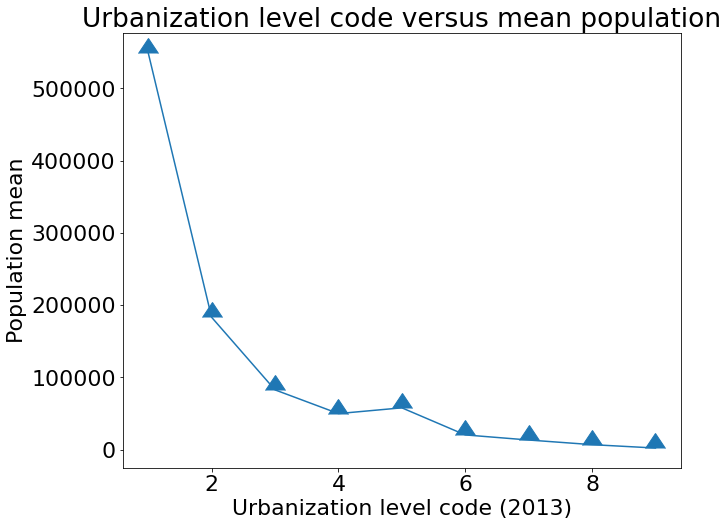

In [11]:
# Check the mean of each groups
plt.figure(figsize=(10,8))
levels=[]
codeMeans=[]
for level in sorted(np.unique(dfTX['Rural-urban_Continuum Code_2013'])):
  codeMean = np.mean(dfTX[dfTX['Rural-urban_Continuum Code_2013']==level]['POP_ESTIMATE_2018'])
  levels.append(level)
  codeMeans.append(codeMean)

plt.plot(levels,codeMeans,marker=10,markersize=20)
plt.title('Urbanization level code versus mean population')
plt.xlabel('Urbanization level code (2013)')
plt.ylabel('Population mean')

### Systematic Random Sampling
If the population has ordered structure, you can first select one at random and then select every n-th member after it.

The following code take every 10th and calculate it mean

In [12]:
random.seed(2020)
idx = random.randint(0,10)
population = dfTX['POP_ESTIMATE_2018'].to_list()
samples=[]
samples.append(population[idx])
while idx+10 < len(population):
  idx += 10
  samples.append(population[idx])
print(np.mean(samples))

158799.64


## Understanding statistics associated with sampling
Here we will use artificial uniform distributions as example, since we want to know:

1.   What is the systematic relationship between sample size and sample mean
2.   What is the relationship between the number of times sampling (trials) with the sample mean distribution (variance)


mean: 5.64, std: 1.4078218992472025
mean: 5.53390625, std: 1.4563112832464553
mean: 5.4877734375, std: 1.4309896472527093
mean: 5.51135, std: 1.4457899838842432


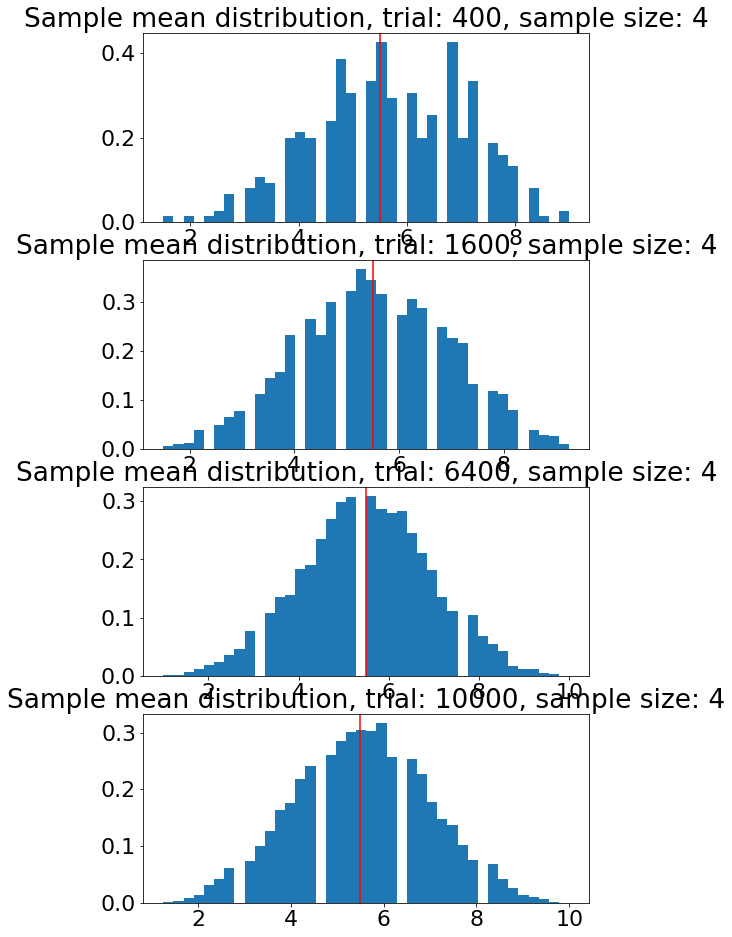

In [13]:
def obtainSampleMeans(trials = 100, sampleSize = 4):
  sampleMeans=[]
  candidates = [i for i in range(1,11)]
  for i in range(trials):
    sampleMean=np.mean([random.choice(candidates) for _ in range(sampleSize)])
    sampleMeans.append(sampleMean)
  return sampleMeans

random.seed(2020)
figure, axes = plt.subplots(4,1,figsize=(8,16))
#figure.tight_layout()
times = [4, 16, 64, 100]
for i in range(len(times)):
  sampleMeans = obtainSampleMeans(100*times[i],4)
  axes[i].hist(sampleMeans,bins=40,density=True)
  axes[i].axvline(5.5,c='r')
  axes[i].set_title('Sample mean distribution, trial: {}, sample size: {}'.format(100*times[i],4))
  print('mean: {}, std: {}'.format(np.mean(sampleMeans),np.std(sampleMeans)));

There are two things we discover:


1.   As the number of trials increase (i.e. the number of samples), the sample means' distribution become smoother and resembling bell-shaped
2.   When the number of trials reach a certain value, the standard deviation doesn't seem to change

Now let us see the effect of changing the size of sample ...

mean: 5.521953125, std: 2.008562358455105
mean: 5.498046875, std: 1.4431059486582176
mean: 5.5065625, std: 1.026083602146409
mean: 5.4973046875, std: 0.722252039615
mean: 5.49095703125, std: 0.5078149154840389
mean: 5.4991259765625, std: 0.3672720550902535
mean: 5.503431396484375, std: 0.25349930497350254
mean: 5.501925659179688, std: 0.1785229416136657


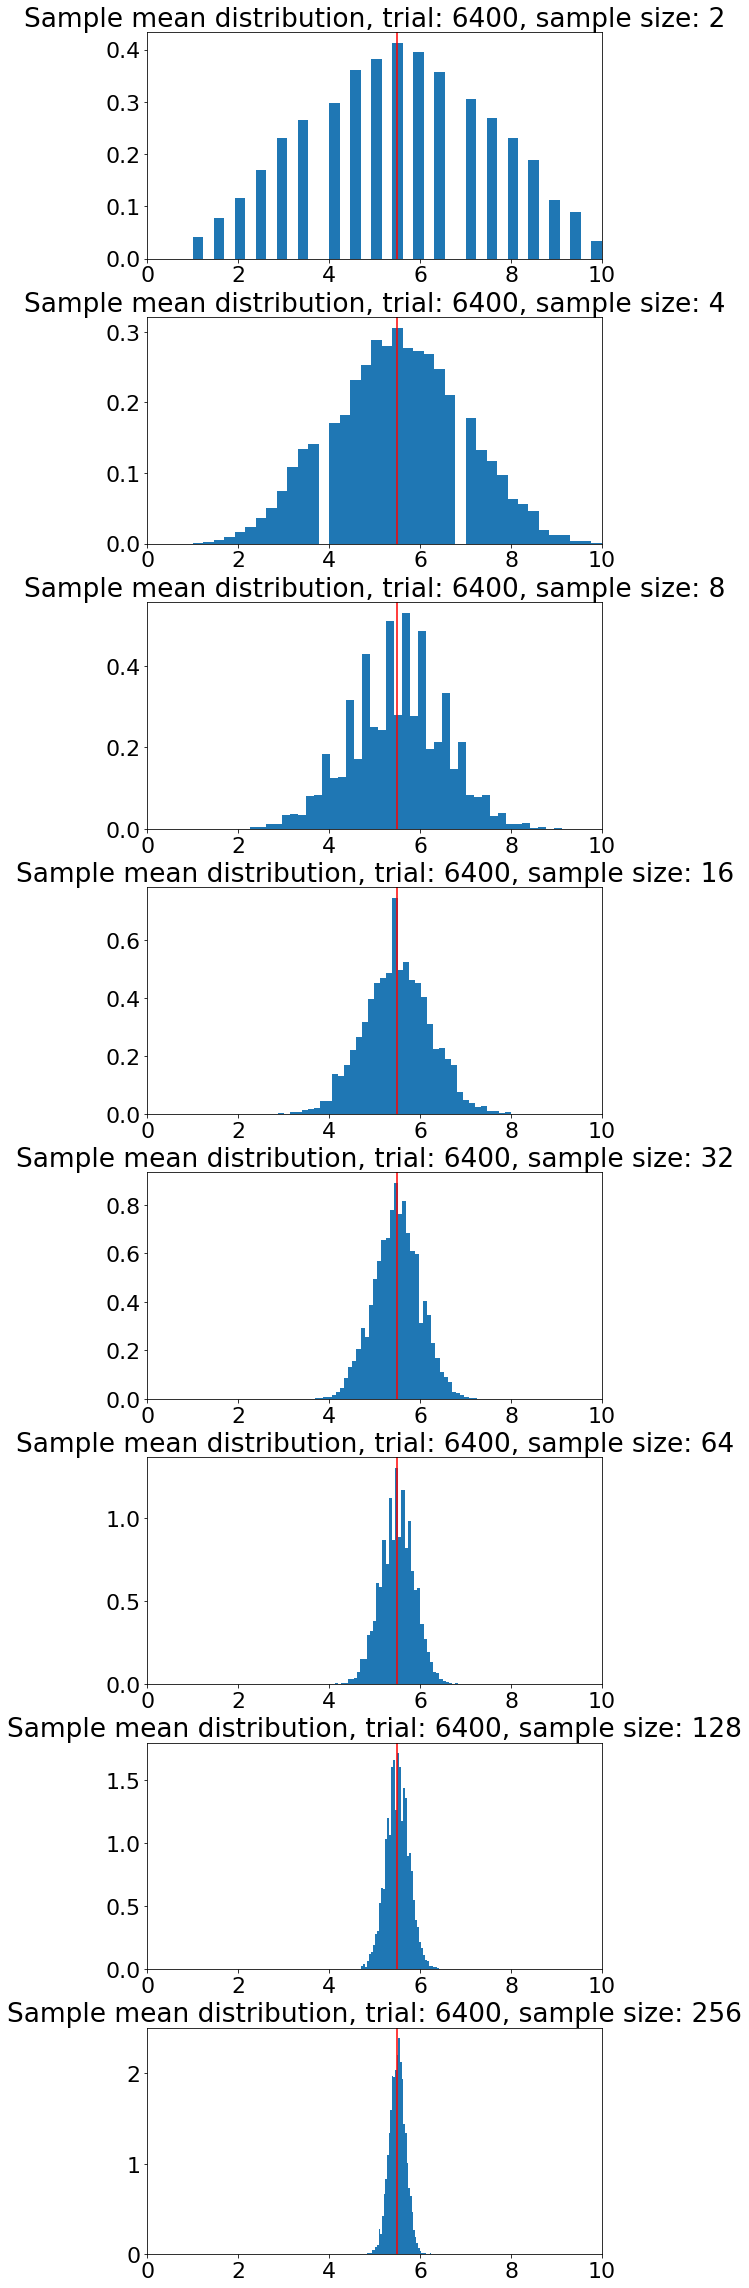

In [20]:
random.seed(2020)
sizes=[2**k for k in range(1,9)]
figure, axes=plt.subplots(8,1,figsize=(8,4*8))
figure.tight_layout()
for i in range(len(sizes)):
  sampleMeans = obtainSampleMeans(6400,sizes[i])
  axes[i].hist(sampleMeans, bins=np.linspace(np.min(sampleMeans),np.max(sampleMeans),40), density=True)
  axes[i].axvline(5.5,c='r')
  axes[i].set_title('Sample mean distribution, trial: {}, sample size: {}'.format(6400,sizes[i]))
  axes[i].set_xlim(0, 10)
  print('mean: {}, std: {}'.format(np.mean(sampleMeans,),np.std(sampleMeans)));

As we can see as the sample size increases, the standard error shrinks. The estimates of the population mean are more precise, hence a tighter and tighter histogram

### Standard error of the sample mean
The sample mean's standard error decreases when the sample size increases as had been shown above. We will do some visualization to find out the exact relationship. The standard error is the standard
deviation of a statistic of a sampling distribution. 

Text(0, 0.5, 'Standard Error of Sample Mean')

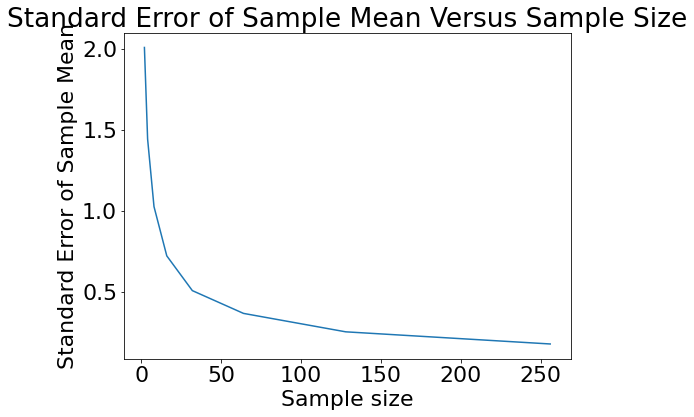

In [19]:
random.seed(2020)
sizes = [2**k for k in range(1,9)]
ses = []

for i in range (len(sizes)):
  sampleMeans = obtainSampleMeans(6400,sizes[i])
  ses.append(np.std(sampleMeans))

plt.figure(figsize=(8,6))
plt.plot(sizes, ses)
plt.title('Standard Error of Sample Mean Versus Sample Size')
plt.xlabel('Sample size')
plt.ylabel('Standard Error of Sample Mean')


If we use the inverse quadratic of standard error, instead of standard error, we can transform the graphic to see a clearer relationship between sample size and standard error

Text(0, 0.5, 'Transformed Standard Error of Sample Mean')

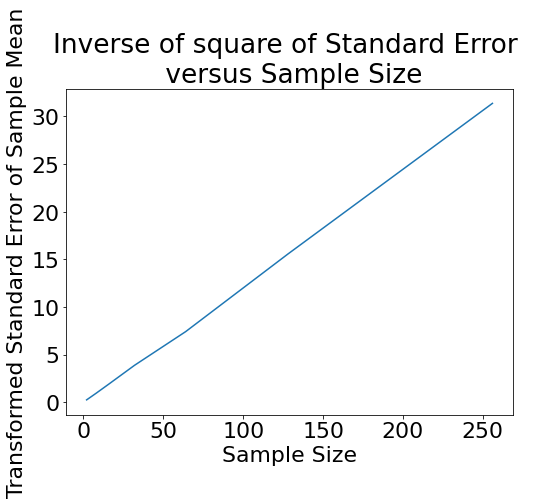

In [21]:
plt.figure(figsize=(8,6))
plt.plot(sizes,[1/ele**2 for ele in ses])
plt.title('Inverse of square of Standard Error \n versus Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Transformed Standard Error of Sample Mean')

We got a linear relationship between the sample size and the inverse of the square of the standard error
$$
\begin{align}
  n \propto \frac{1}{\sigma^2 }
  → \sigma \propto \frac{1}{\sqrt {n}}
\end{align}
$$

If n = 1 then $\sigma$ refers to the population standard error. So the relationship between standard deviation of population and sample can be expressed as:
$$
\begin{align}
\sigma_n = \frac {\sigma}{\sqrt{n}}
\end{align}
$$